In this Lab our goal is, again, to minimize a function of two parameters given certain constraints on them. However, in the case of the function of this lab, we find that it is not a differentiable function at x = 0 because of the term 
||Ax|| (we would see a square root of 0). For this, we are not able to apply the typical gradient descent algorithm to this function as it is (it would not converge to an optimal value). For the purpose of finding a minimum for the function, we have to note that ||Ax|| = max <x, y>, where ||y||<=1. Even though this process adds a new variable, and at first it may seem a more complicated function, we observe that now we have a differentiable function if we write H(x,y) =<Ax, y> +1/2λ *||x-b||^2. Considering f(x) = max_y𝝐C H(x, y), where C = {y:||y||<=1}. 

Now, in order to find a minimum of the function we can find min_x f(x) = min_x max_y𝝐C H(x,y). Since H(x, y) is concave on any fixed x, and convex on any fixed y, we can also state the problem as max_y𝝐C min_x H(x,y). To find a solution we can now apply the typical gradient descent algorithm. One approach is to solve the problem for both variables at the same time (primal-dual) using gradient descent and ascent for x and y respectively. An other method (dual) would be to find first min_x H(x,y) = f_d (y) and then find the maximum of f_d(y) given the restriction for y.

Therefore, the goal for this Lab is to apply this algorithm and visually see how we find a minimum for the function using both approaches and being able to understand the differences between them.

In [ ]:
#!pip install ipympl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display
%matplotlib widget

## **1. Minimization of a convex non-differentiable function**

#### **1. Run toy_saddle_points() and determine which of the functions displayed presents a saddle point and which do not.**

In [ ]:
def toy_saddle_points():
    # Define the grid
    start = -5
    stop = 5
    step = .05
    x = np.arange(start = start, stop = stop + step, step = step)
    y = np.arange(start = start, stop = stop + step, step = step)
    
    # Create the mesh grid
    x, y = np.meshgrid(x, y)
    
    # ============================ #
    # FIRST FUNCTION
    # ============================ #
    # Calculate the function
    f1 = np.power(x, 2) - np.power(y, 2)

    # Plot it
    fig = plt.figure(num = 1, figsize = (14, 8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, f1,
                   cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    ax.set_title("First function [ x^2 - y^2 ]")
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(x, y, f1, 
              corner_mask = False, levels = 150, 
               linewidths=(1,), cmap = cm.coolwarm)
    
    # ============================ #
    # SECOND FUNCTION
    # ============================ #
    # Calculate the function
    f2 = 2 * x + y

    # Plot it
    fig = plt.figure(num = 2, figsize = (14, 8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, f2,
                   cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    ax.set_title("Second function [2x + y]")
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(x, y, f2, 
              corner_mask = False, levels = 150, 
               linewidths=(1,), cmap = cm.coolwarm)
    
    # ============================ #
    # THIRD FUNCTION
    # ============================ #
    # Calculate the function
    f3 = np.power(x, 2) + np.power(y, 2)

    # Plot it
    fig = plt.figure(num = 3, figsize = (14, 8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, f3,
                   cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    ax.set_title("Third function [ x^2 + y^2 ]")
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(x, y, f3, 
              corner_mask = False, levels = 150, 
               linewidths=(1,), cmap = cm.coolwarm)
    
    # ============================ #
    # FOURTH FUNCTION
    # ============================ #
    # Calculate the function
    f4 = np.cos((3 / 5) * (x + y)) + 0.25 * x

    # Plot it
    fig = plt.figure(num = 4, figsize = (14, 8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, f4,
                   cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    ax.set_title("Fourth function [cos(3/5 * (x + y)) + 0.25 * x]")
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(x, y, f4, 
              corner_mask = False, levels = 150, 
               linewidths=(1,), cmap = cm.coolwarm)
    
    

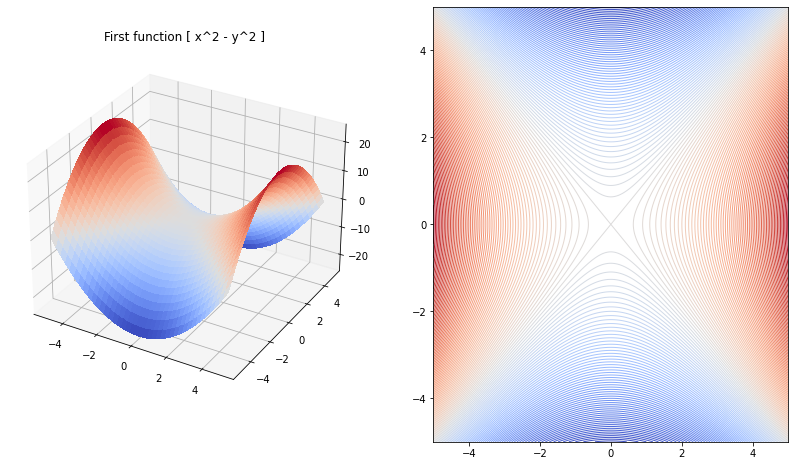

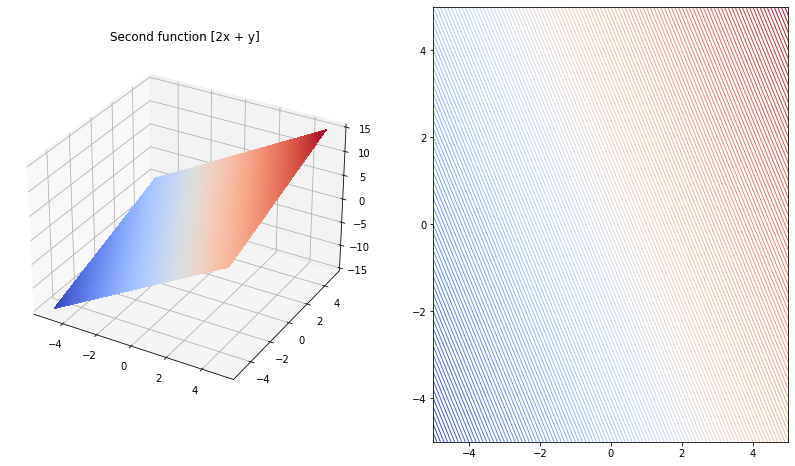

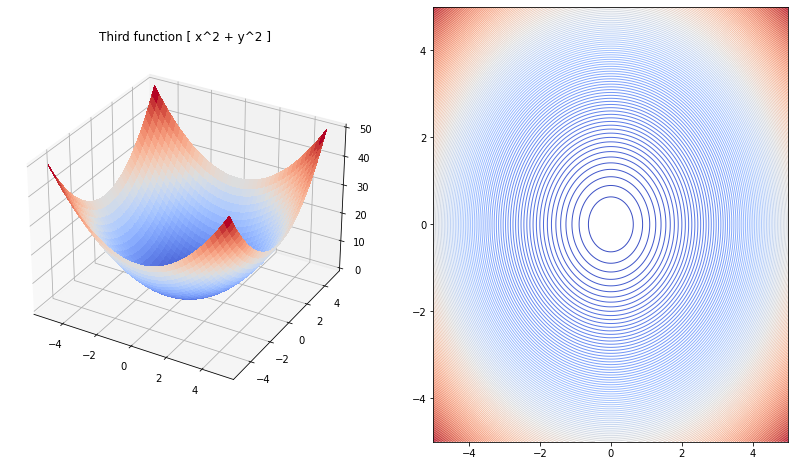

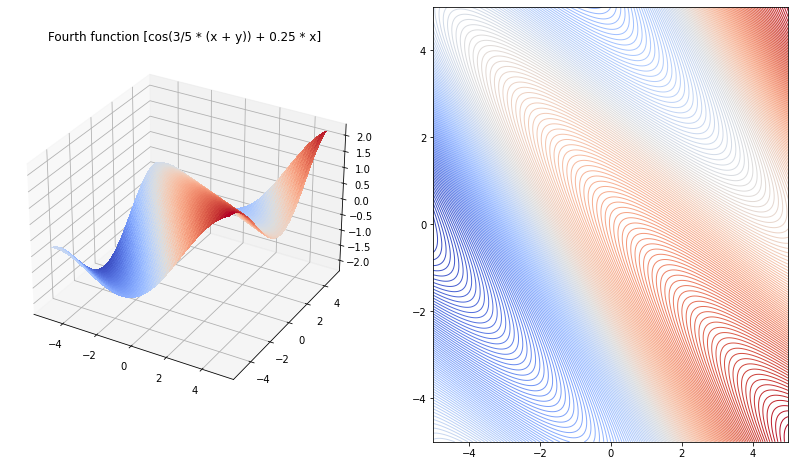

In [ ]:
%matplotlib inline
toy_saddle_points()

**1)Run toy_saddle_points and determine which of the functions displayed presents a saddle point and which do not.**

First of all, we clearly see that the first function have a saddle point, since the point would be a minimum over one of the axis and a maximum in the other axis. In addition we can deduce from the map that the curvatures in two mutually perpendicular planes are of opposite signs, so it strictly has to be a saddle point.

In the second function we can notice that there is no critical point at all, so there is not a saddle point neither.

About the third one, we see there is a critical point, but in the figure we can notice it is clearly a global minima, so there are not saddle points in this function neither.

Finally, the last function is the most confusing one, since we can see some points that could be critical points, but they would be local minima or maxima, since we clearly do not see that there are no opposite directions of the curvatures in the point.

#### **2. Complete the function toy_primal_dual. Follow the comments provided in the code.**

**2)Show that the ’partial’ gradients of G, ∇xG and ∇yG with respect to x and y are given by 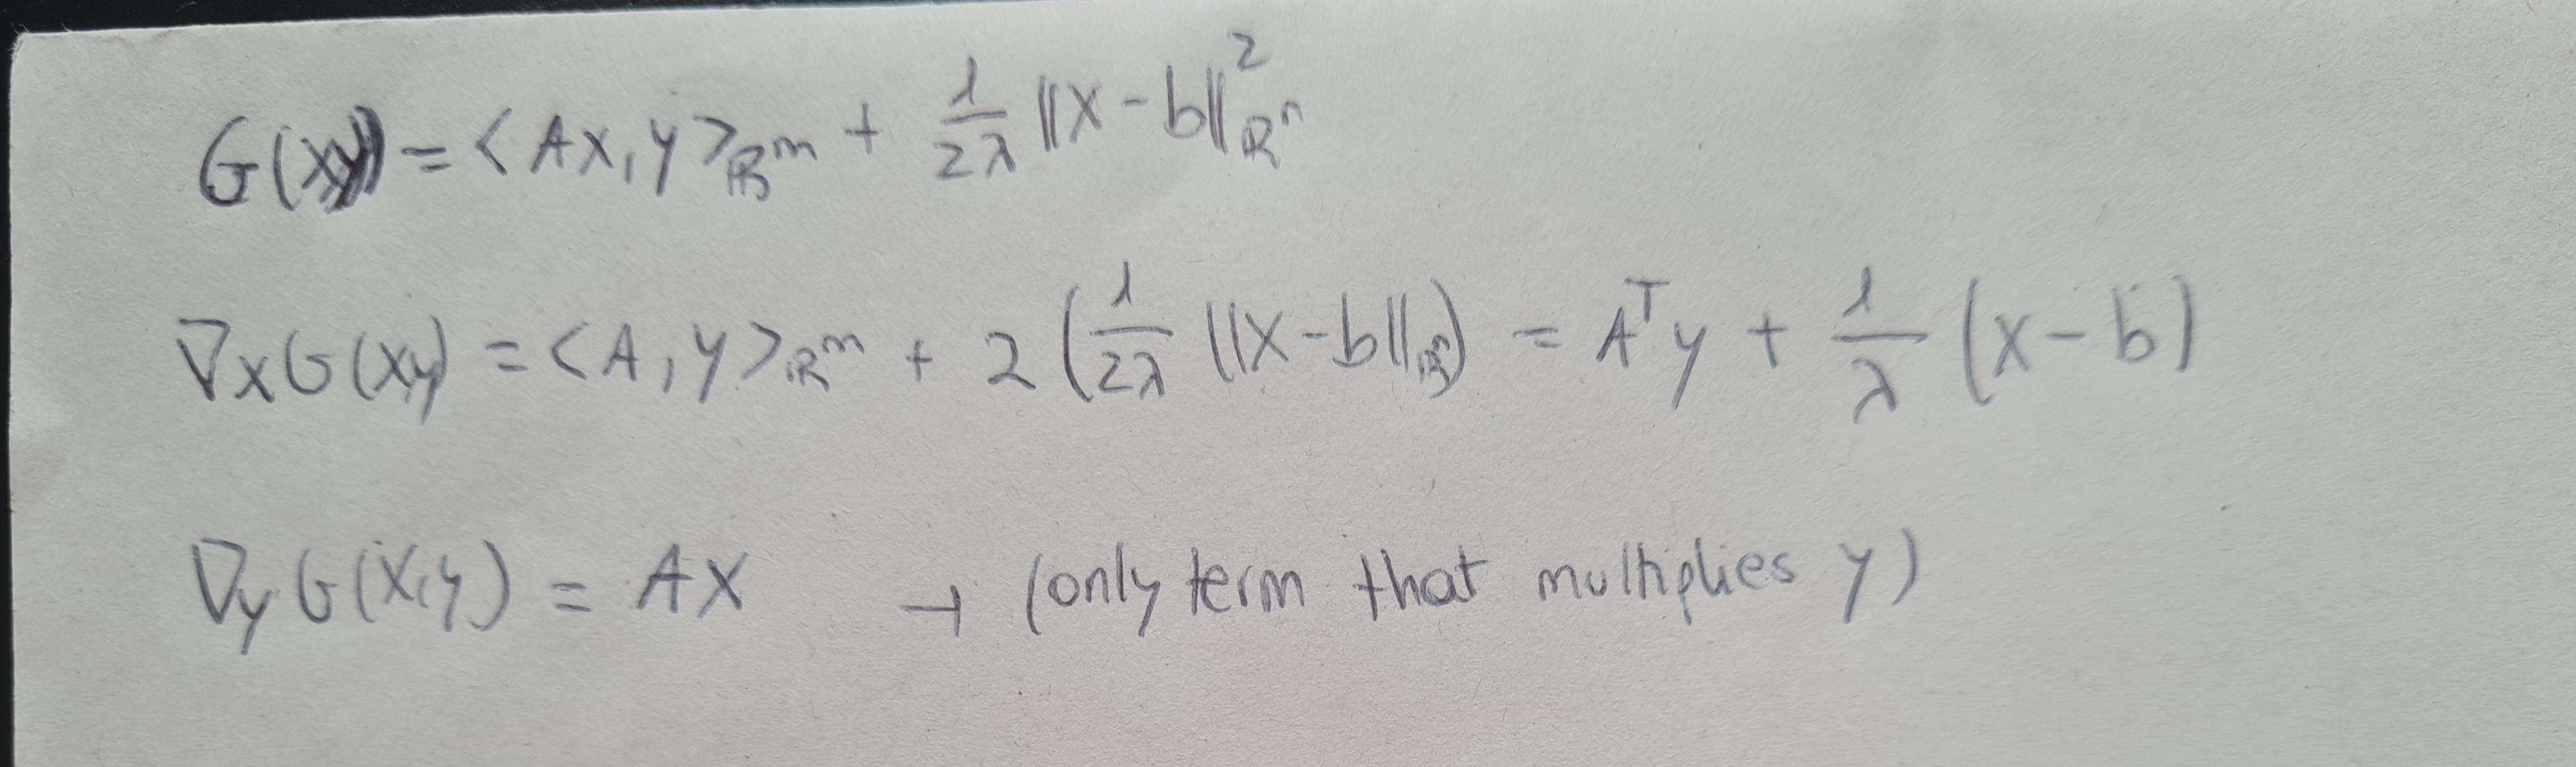**

In [ ]:
def toy_primal_dual(A, b, lambda_, x, pd_prms, fig = None, ax1 = None, ax2 = None, ax3 = None, ax4 = None):
    """
    toy_primal_dual - minimizes a non-differentiable function f:R^n-:param R of the
    form 

       f(x) = ||Ax|| + 1/(2*lambda)*|| x - b ||^2. 

    using a form of duality to remove the non-differentiability. It transforms
    the problem into a max-min problem, solved numerically with a gradient
    descent and gradient ascent.

    [x,y] = toy_primal_dual (A, b, lambda, x, pd_prms) 

    :param A       : mxn matrix (n is the dimension of x)
    :param b       : nx1 vector
    :param lambda  : weight between two terms
    :param x       : nx1 initial condition for primal variable
    :param pd_prms : a structure with the dual maximization parameters. Needs to have
                     the following fields:
                     
                        :param delta     : dual gradient ascent step size
                        :param theta     : primal gradient descent step size
                        :param max_iters : maximum number of iterations
                        :param tolerance : tolerance for the stopping condition (it stop when 
                                           the norm of the gradient is below the tolerance)

    :return x     : primal value found (nx1)
    :return y     : dual   value found (mx1)
    :return fps   : evolution of the primal function (total_iters x 1 vector)
    :return fds   : evolution of the dual function (total_iters x 1 vector)
    """
    # Get all the params
    tolerance = pd_prms.get("tolerance")
    max_iters = pd_prms.get("max_iters")
    delta     = pd_prms.get("delta")
    theta     = pd_prms.get("theta")
    
    # initialize dual to 0
    y = 0 * x

    # vectors with function values
    fps = []
    fds = []

    # begin projected gradient ascent
    it = 0
    dual_gap = np.inf
    while (dual_gap > tolerance) and (it < max_iters):
        # Increment the iteration
        it = it + 1
        
        # Save the current value, just for displaying
        x_old = x
        y_old = y


        # update x by gradient descent with step theta
        x = x_old - theta*(np.dot(A.T,y)+(1/lambda_)*(x_old-b))

        # update y by gradient ascent with step delta
        y = y_old + delta*np.dot(A,x)
        
        # project y over constraint set
        y = y/max(np.linalg.norm(y), 1)

        # compute primal energy
        P_data = (1 / 2 / lambda_) * np.power(x - b, 2).sum()
        P = np.linalg.norm(np.dot(A, x)) + P_data

        # compute dual energy
        Aty = np.dot(A.T, y)
        D = np.dot(b.T, Aty) - lambda_ / 2 * np.power(Aty, 2).sum()

        # compute primal dual energy
        PD = np.dot(np.dot(A, x).T, y) + P_data

        # update dual gap (primal-dual)
        dual_gap = P-D

        # Update the arrays
        fps.append(P)
        fds.append(D)
        
        # Update the plot
        if fig is not None:
            # ---- 
            if x.shape[0] == 2 and x.shape[1] == 1:
                ax1.plot([x_old[0, 0], x[0, 0]], 
                         [x_old[1, 0], x[1, 0]], "-k")
                ax2.plot([y_old[0, 0], y[0, 0]], 
                         [y_old[1, 0], y[1, 0]], "-k")
                ax3.scatter(x[0, 0], x[1, 0], P, marker = "o", color = "k")
                ax4.scatter(y[0, 0], y[1, 0], D, marker = "o", color = "k")
                
            elif x.shape[0] == 1 and x.shape[1] == 1:
                ax1.plot(x, P, marker = '.', color = "k")
                ax2.plot(y, D, marker = '.', color = "k")
                ax3.plot([x_old[0, 0], x[0, 0]], 
                         [y_old[0, 0], y[0, 0]], "-k")
                ax4.scatter(x, y, PD, marker = "o", color = "k")
                
            else:
                pass
            # ----
            display.clear_output(wait=True)
            display.display(fig) 
        
        # Print the current values
        print('[It. {0} of {1}] |P( x(k) ) - D( y(k) )| = {2}. {3}'.format(it, max_iters,dual_gap, P))

    return fps, fds

#### **3. Complete the function toy_dual. Follow the comments provided in the code.**

**4) Show that x(y) (the minimizer of G(x, y) with respect to x by keeping fixed y) is given by**

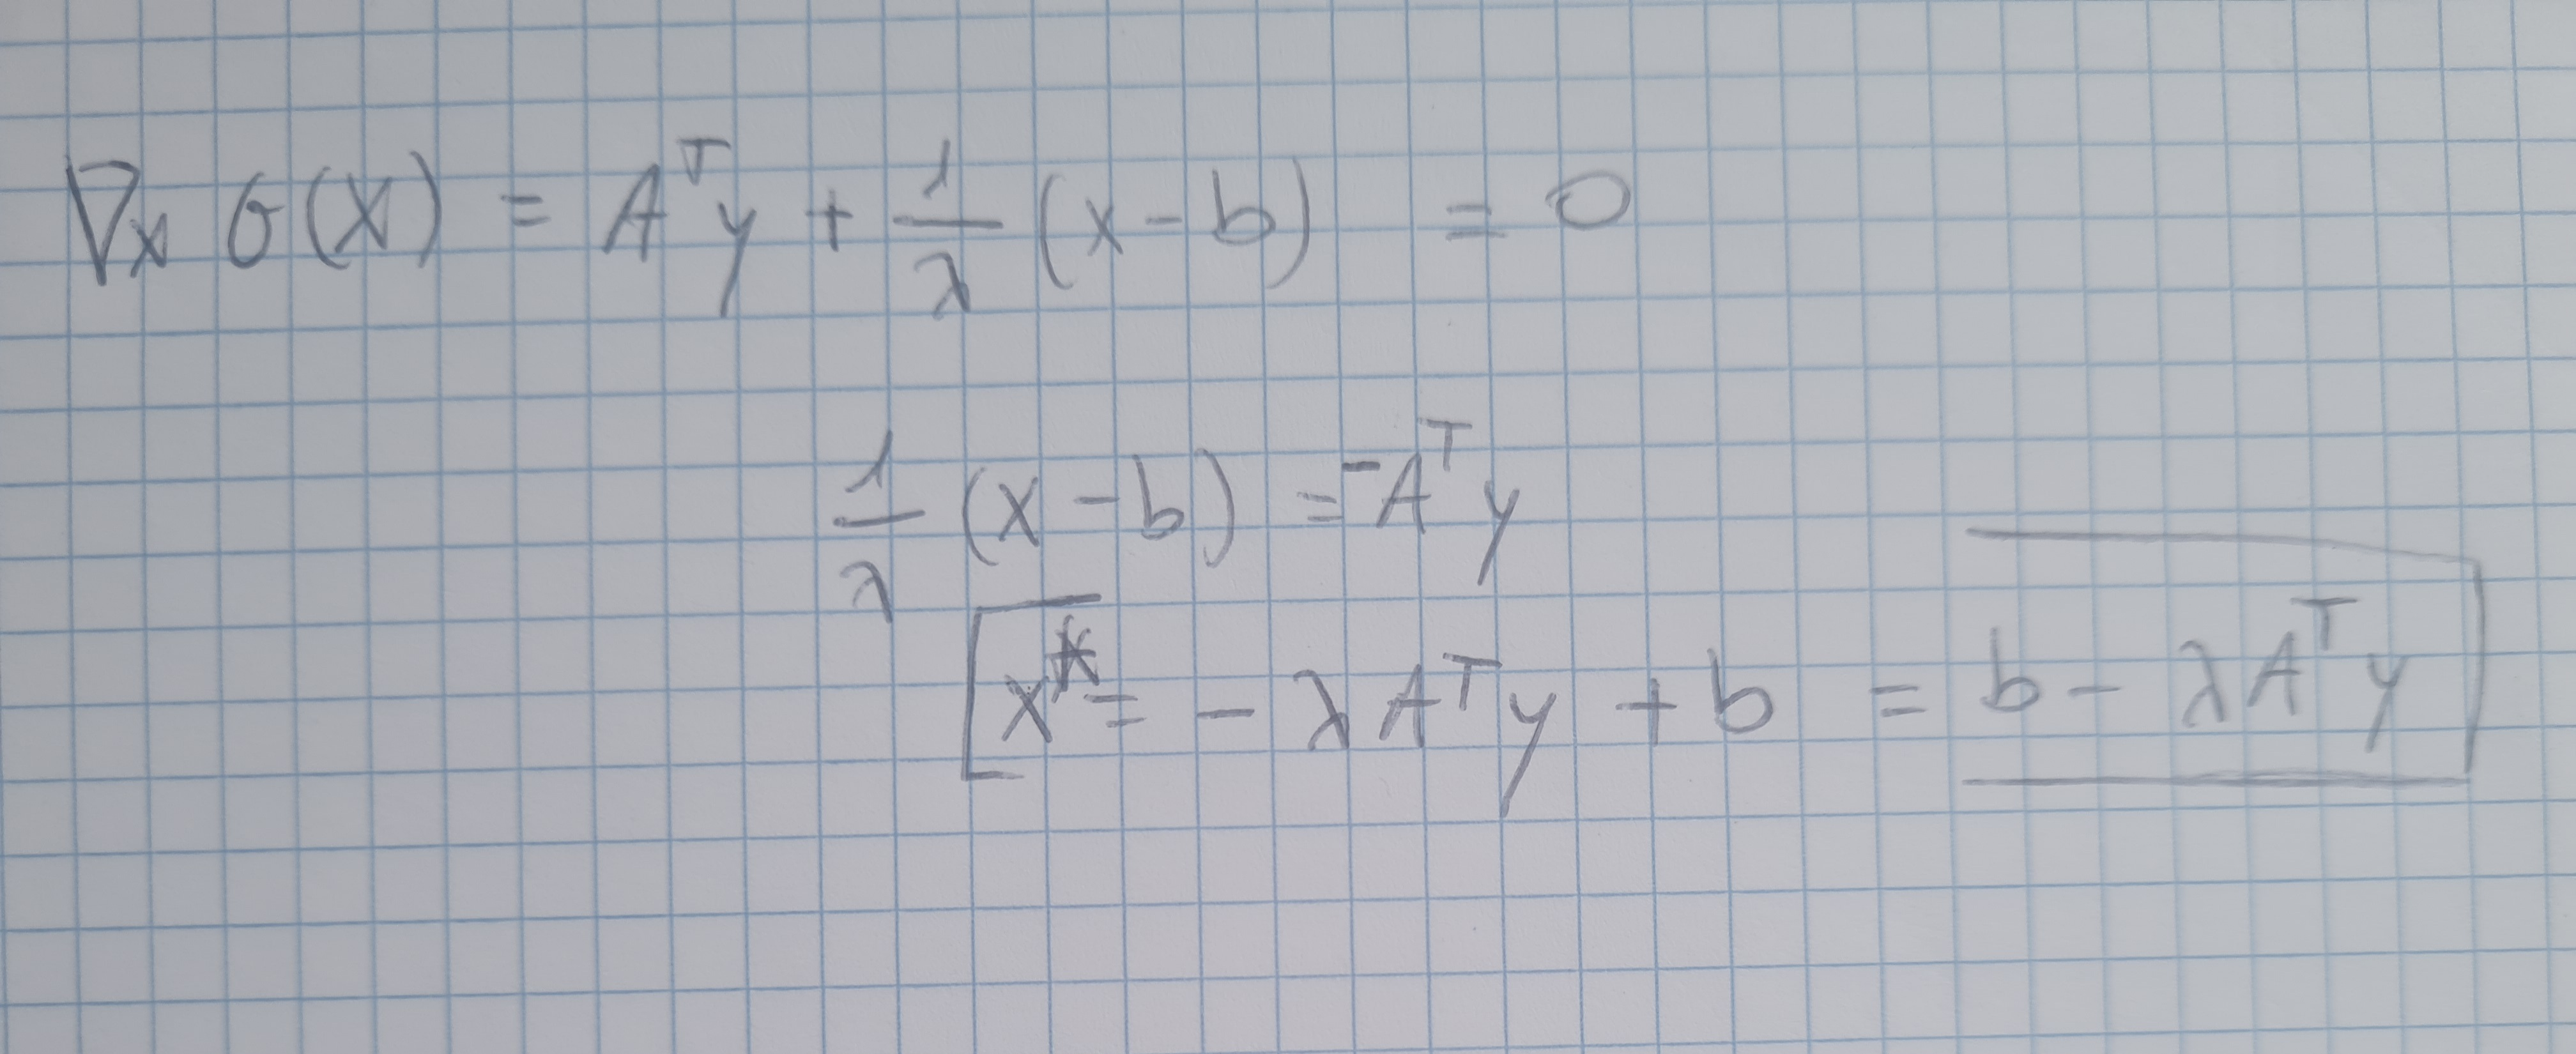

**5) Show that ∇fD(y) is given by ∇fD(y) = Ab − λAAT y.**
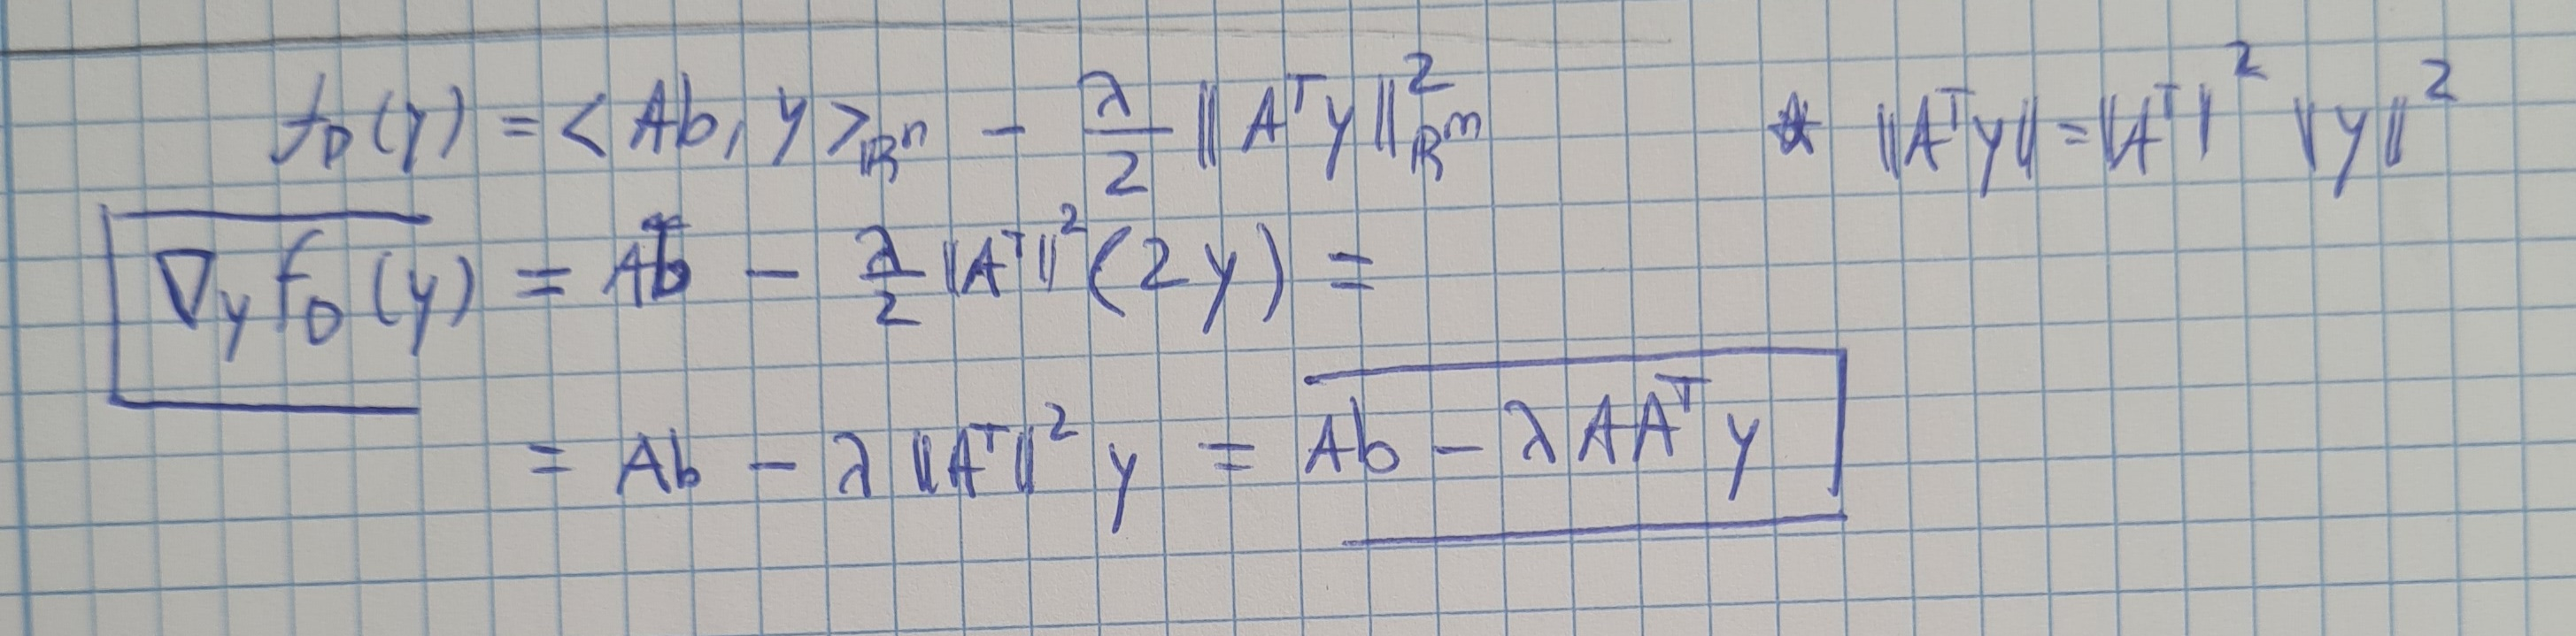

In [ ]:
def toy_dual(A, b, lambda_, d_prms, fig = None, ax1 = None, ax2 = None, ax3 = None, ax4 = None):
    """
    toy_dual - minimizes a non-differentiable function f:R^n-:param R of the form 

       f(x) = ||Ax|| + 1/2/lambda*|| x - b ||^2. 

    using a form of duality to remove the non-differentiability. It transforms
    the problem into a max-min problem, eliminates the primal by solving the min
    analytically, and solves the max numerically with a gradient ascent.

    [x,xi] = toy_dual (A, b, lambda, d_prms) 

    :param A      : mxn matrix (n is the dimension of x)
    :param b      : nx1 vector
    :param lambda : weight between two terms
    :param d_prms : a structure with the dual maximization parameters. Needs to have
                    the following fields:
                   :param delta     : gradient ascent step size
                   :param max_iters : maximum number of iterations
                   :param tolerance : tolerance for the stopping condition (it stop when 
                                      the norm of the gradient is below the tolerance)

    :return x     : primal value found (nx1)
    :return xi    : dual   value found (mx1)
    :return fps   : evolution of the primal function (total_iters x 1 vector)
    :return fds   : evolution of the dual function (total_iters x 1 vector)
    """
    # Get all the params
    tolerance = d_prms.get("tolerance")
    max_iters = d_prms.get("max_iters")
    delta     = d_prms.get("delta")
    
    # Initialization
    y = np.zeros((len(A), 1))
    
    # Initialize x
    x = b - lambda_*(np.dot(A.T, y))

    # vectors with function values
    fps = []
    fds = []

    # begin projected gradient ascent
    it = 0
    dual_gap = np.inf
    while (dual_gap > tolerance) and (it < max_iters):
        # Increment the iteration
        it = it + 1
        
        # Save the current value, just for displaying
        y_old = y

        # update y by gradient ascent with step delta
        y  = y_old + delta*(np.dot(A, x))

        # project y over constraint set
        y = y/max(np.linalg.norm(y), 1)

        # compute primal variable as x^*(xi)
        x_old = x
        x = b - lambda_*(np.dot(A.T, y))

        # compute primal energy
        P_data = (1 / 2 / lambda_) * np.power(x - b, 2).sum()
        P = np.linalg.norm(np.dot(A, x)) + P_data

        # compute dual energy
        Aty = np.dot(A.T, y)
        D = np.dot(b.T, Aty) - lambda_ / 2 * np.power(Aty, 2).sum()

        # compute primal dual energy
        PD = np.dot(np.dot(A, x).T, y) + P_data

        # TODO: update dual gap
        dual_gap = P-D

        # Update the arrays
        fps.append(P)
        fds.append(D)
        
        # Update the plot
        if fig is not None:
            # ---- 
            if x.shape[0] == 2 and x.shape[1] == 1:
                ax1.plot([x_old[0, 0], x[0, 0]], 
                         [x_old[1, 0], x[1, 0]], "-k")
                ax2.plot([y_old[0, 0], y[0, 0]], 
                         [y_old[1, 0], y[1, 0]], "-k")
                ax3.scatter(x[0, 0], x[1, 0], P, marker = "o", color = "k")
                ax4.scatter(y[0, 0], y[1, 0], D, marker = "o", color = "k")
                
            elif x.shape[0] == 1 and x.shape[1] == 1:
                ax1.plot(x, P, marker = '.', color = "k")
                ax2.plot(y, D, marker = '.', color = "k")
                ax3.plot([x_old[0, 0], x[0, 0]], 
                         [y_old[0, 0], y[0, 0]], "-k")
                ax4.scatter(x, y, PD, marker = "o", color = "k")
                
            else:
                pass
            # ----
            display.clear_output(wait=True)
            display.display(fig)  
        
        # Print the current values
        print('[It. {0} of {1}] |P( x(k) ) - D( y(k) )| = {2}. {3}'.format(it, max_iters,dual_gap, P))

    return fps, fds

#### **4. Run the functions toy_problem_R1 and toy_problem_R2. Explain the plots that are displayed in each case. Try different parameters as suggested in the comments in the code.**

In [ ]:
def toy_problem_r1():
    # vector x to plot primal function
    x = np.matrix(np.arange(start = -5, stop = 5.01, step = .01))
    pmg_sz = len(x)

    # vector y to plot dual function
    y = np.matrix(np.arange(start = -1.1, stop = 1.1, step = .01))
    dmg_sz = len(y)

    # parameters of primal function
    A = np.identity(n = 1)
    b = np.matrix([-6])
    lambda_ = 3  # TRY also lambda_ = 10

    # compute primal function on x
    Ax = A * x
    E1 = np.sqrt(np.power(Ax, 2))
    E2 = np.power(x - np.tile(b, [1, pmg_sz]), 2)
    E  = E1 + (1 / (2 * lambda_)) * E2

    # compute dual function on y
    Aty = A.T * y
    D = np.dot(b.T, Aty) - lambda_ / 2 * np.power(Aty, 2)
    D = np.where(np.power(y, 2) > 1, np.nan, D)

    # compute primal-dual function on a primal-dual grid
    X, Y = np.meshgrid(x,y) # this is a primal-dual grid
    pdmg_sz = len(X)

    PD = np.tile(E2, [dmg_sz, 1]) / (2 * lambda_) + y.T * Ax
    PD = np.where(np.power(Y, 2) > 1, np.nan, PD)

    # ------- #
    # PLOT 
    # ------- #
    # Make the plots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 8))
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax1.plot(np.array(x)[0], np.array(E)[0])
    ax2.plot(np.array(y)[0], np.array(D)[0])
    ax3.contour(X, Y, PD, 
            corner_mask = False, levels = 150, 
            linewidths=(1,), cmap = cm.coolwarm)
    ax4.plot_surface(X, Y, PD, cmap=cm.coolwarm,
                     linewidth=0, antialiased=False, 
                     vmax=1)
    ax1.set_title("Primal")
    ax2.set_title("Dual")
    ax3.set_title("Primal Dual")
    ax4.set_title("Primal Dual")
    
    # primal dual ----------------------------------------------
    x0 = np.matrix([3])
    pd_prms = {"delta": 0.05,
               "theta": 0.5,
               "max_iters": 1000,
               "tolerance": 1e-8}
    fps, fds = toy_primal_dual(A, b, lambda_, x0, pd_prms, fig, ax1, ax2, ax3, ax4)

    # dual ----------------------------------------------
    input("Press Enter to continue...")
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 8))
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax1.plot(np.array(x)[0], np.array(E)[0])
    ax2.plot(np.array(y)[0], np.array(D)[0])
    ax3.contour(X, Y, PD, 
            corner_mask = False, levels = 150, 
            linewidths=(1,), cmap = cm.coolwarm)
    ax4.plot_surface(X, Y, PD, cmap=cm.coolwarm,
                     linewidth=0, antialiased=False, 
                     vmax=1)
    ax1.set_title("Primal")
    ax2.set_title("Dual")
    ax3.set_title("Primal Dual")
    ax4.set_title("Primal Dual")
    d_prms = {"delta": 2e-2,
              "max_iters": 1000,
              "tolerance": 1e-8}
    fps, fds = toy_dual(A, b, lambda_, d_prms, fig, ax1, ax2, ax3, ax4)

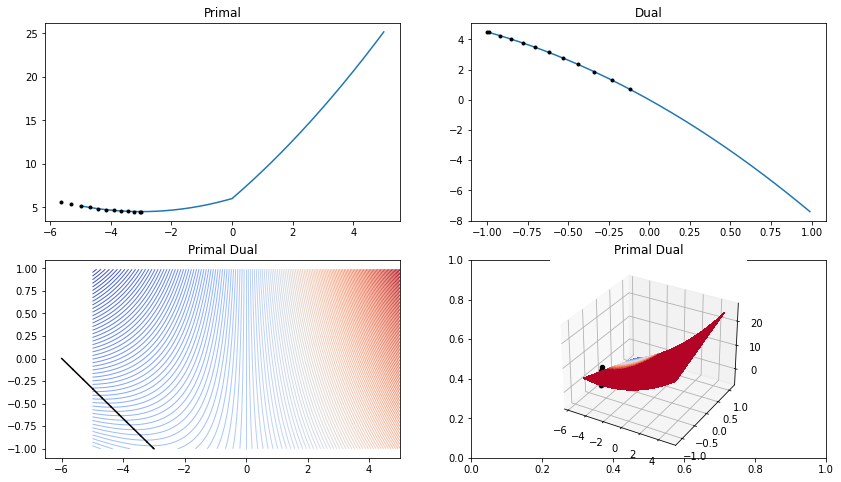

[It. 12 of 1000] |P( x(k) ) - D( y(k) )| = [[0.]]. 4.5


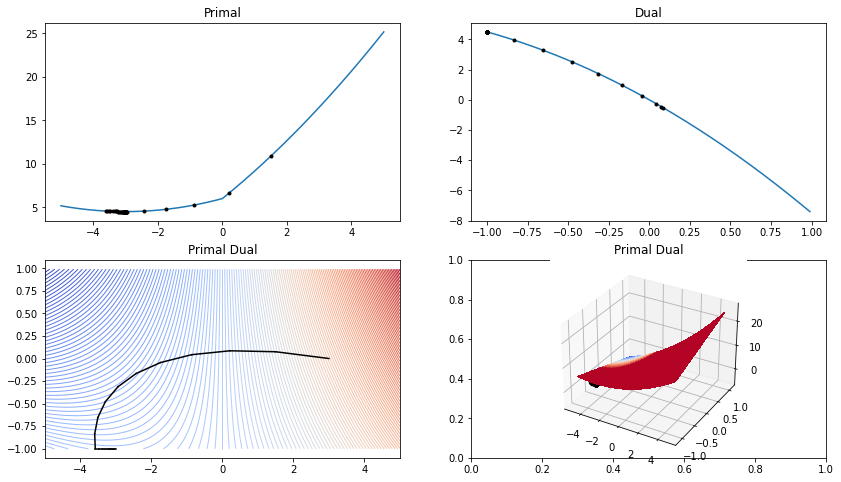

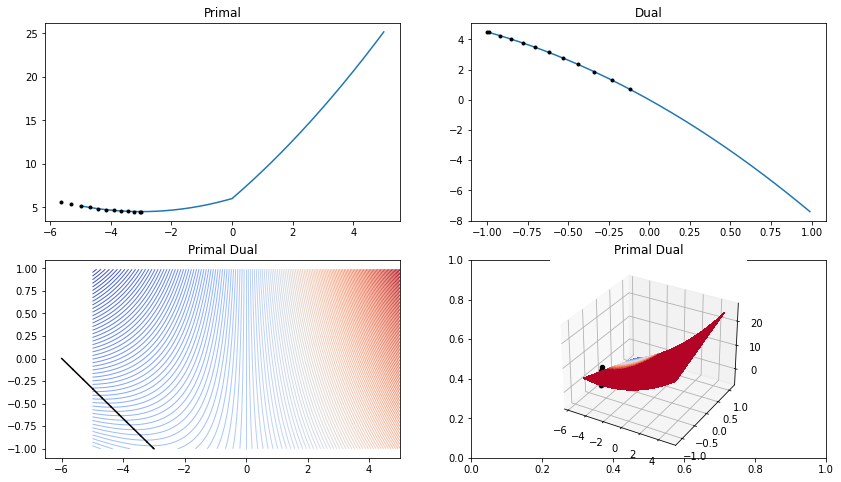

In [ ]:
toy_problem_r1()

We see that in the primal-dual approach of this problem, we are able to find a minimum and we notice that the steps that we take in this solution follow a  certain curvature before arriving to its optimal solution. We also noticed that the dual function arrives to the same solution in both approaches. However, the solution for the primal function, differ with each other. If we look at the primal energy, we observed that both solutions achieved the same value for the Primal energy (4.5) therefore the minimum of the function is at 4.5.

When we observe that in the dual approach, the steps we take in order to achieve the minimum of the function were in the same direction and following a straight line. However, we still arrive to a minimum at 4.5. The fastest approach was the dual approach which took 12 iterations while the primal-dual took around 53 iterations which is 4 times the iterations in the dual approach.

Moreover, if we modify the tolerance value, the number of iterations of the primal-dual approach changes too, but not the dual. For instance, if we choose a tolerance of 1e-36 instead of 1e-8, the dual approach take 98 iterations, 45 more than before, while with a tolerance of 1e-2 it takes 15 iterations, quite less. However, for both values the dual approach still takes just 12 iterations. This makes us notice that the tolerance and the number of iterations of the primal-dual approach are inversely correlated, while the dual approach is that fast that increasing or decreasing the number of iteratiosn do not affect it.

However, when it comes to the delta value it does have an effect on both approaches. With a delta value of 0.005 the primal-dual approach takes 90 iterations and the dual takes 46, almost 4 times more than before. Moreover, the followed path takes a moore smooth curvature, which leads it to take more steps. In the other hand, with a delta value of 0.5, the primal-dual approach takes 48 iterations and the dual just one, and both take a less smooth curvature, more lyke polygonal one, with clear vertices. In fact, the dual one takes just one single line from the origin to the minimum.

Now le'ts focus on the most relevant parameter: the lambda. For that we are going to keep the original values of tolerance and step size and we are going to set a lambda of 10 (it was 3 before). In this case we can notice a noticeable change in the convergence rates, since the primal dual lasts 583 iterations to find the minima. But we also notice another important difference: since it does not use the same function, the followed path is different and also the reached point. We see how the path is like an espiral that lasts a lot to find the final point, which in the figure seems to be a saddle point. The same happens, in proportion, with the dual approach, which lasts 87 iterations (before were 12) and also follows a straight line to the final point, which is the same value for the Primal energy (1.8) therefore the minimum of the function is at 1.8.

Finally, we try changing the step size with the new lambda, and we obtain really similar results. With a delta of 0.5 (10 times the previous), the primal-dual takes 553 iterations, which is practically the same as before, but the dual one surprisingly takes even more iterations than the dual, when it took quite less in all the previous cases. That could be because finding the desired point in a straight line like the dual problem does could be more optimal with a determined step size, but when this step size is too big it could be really difficult to reach the exact position of the point.

In [ ]:
def toy_problem_r2():
    # primal mesh to draw primal function
    xx1 = np.matrix(np.arange(start = -15, stop = 10.1, step = .1))
    xx2 = np.matrix(np.arange(start = -10, stop = 15.1, step = .1))
    [x1, x2] = np.meshgrid(xx1, xx2)
    x = np.vstack((x1.T.flatten(), x2.T.flatten()))
    pmg_sz = x1.shape

    # dual mesh to draw dual function
    xy1 = np.matrix(np.arange(start = -1.1, stop = 1.1, step = .01))
    xy2 = np.matrix(np.arange(start = -1.1, stop = 1.1, step = .01))
    [y1, y2] = np.meshgrid(xy1, xy2)
    y = np.vstack((y1.T.flatten(), y2.T.flatten()))
    dmg_sz = y1.shape


    # parameters of primal function
    A = np.matrix([[1, -.5], [-.5, 1]])
    b = np.matrix([[-10], [3]])
    lambda_ = 4

    # compute primal function on primal grid
    Ax = np.dot(A, x)
    E1 = np.sqrt(np.power(Ax, 2).sum(axis = 0))
    E2 = np.power(x - np.tile(b, [1, np.prod(pmg_sz)]), 2).sum(axis = 0)
    E  = np.reshape(E1, pmg_sz).T + (1 / (2 * lambda_)) * np.reshape(E2, pmg_sz).T

    # compute dual function on dual grid
    Aty = np.dot(A.T, y)
    D = np.reshape(np.dot(b.T, Aty) - lambda_ / 2 * np.power(Aty,  2).sum(axis = 0), dmg_sz).T
    D = np.where((np.power(y, 2).sum(axis = 0) > 1).reshape(dmg_sz), np.nan, D)

    # ------- #
    # PLOT 
    # ------- #
    # Make the plots
    
    # NOTE: in this case x and y are two dimensional variables. 
    #       Therefore, G(x,y) is a function of 4 variables and we
    #       cannot plot it. We only plot the primal and the dual 
    #       functions.
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 8))
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax1.contour(x1, x2, E, 
            corner_mask = False, levels = 150, 
            linewidths=(1,), cmap = cm.coolwarm)    
    ax2.contour(y1, y2, D, 
                corner_mask = False, levels = 150, 
                linewidths=(1,), cmap = cm.coolwarm)
    ax3.plot_surface(x1, x2, E, cmap=cm.coolwarm,
                     linewidth=0, antialiased=False#, 
                     #vmax=1
                     )
    ax4.plot_surface(y1, y2, D, cmap=cm.coolwarm,
                     linewidth=0, antialiased=False#, 
                     #vmax=1
                     )
    ax1.set_title("Primal function")
    ax2.set_title("Dual function")
    ax3.set_title("Primal function")
    ax4.set_title("Dual function")
    
    # primal dual ----------------------------------------------
    pd_prms = {"tolerance": 1e-4,
               "delta": 1e-1,
               "theta": 1e-0,
               "max_iters": 1000}
    x_star, y_star = toy_primal_dual(A, b, lambda_, np.matrix([[5], [-5]]), pd_prms, fig, ax1, ax2, ax3, ax4)
    
    # dual ----------------------------------------------
    input("Press Enter to continue...")
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 8))
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax1.contour(x1, x2, E, 
            corner_mask = False, levels = 150, 
            linewidths=(1,), cmap = cm.coolwarm)    
    ax2.contour(y1, y2, D, 
                corner_mask = False, levels = 150, 
                linewidths=(1,), cmap = cm.coolwarm)
    ax3.plot_surface(x1, x2, E, cmap=cm.coolwarm,
                     linewidth=0, antialiased=False#, 
                     #vmax=1
                     )
    ax4.plot_surface(y1, y2, D, cmap=cm.coolwarm,
                     linewidth=0, antialiased=False#, 
                     #vmax=1
                     )
    ax1.set_title("Primal function")
    ax2.set_title("Dual function")
    ax3.set_title("Primal function")
    ax4.set_title("Dual function")
    d_prms = {"tolerance": 1e-4,
               "delta": 5e-1,
               "max_iters": 1000}
    x_star, y_star = toy_dual(A, b, lambda_, d_prms, fig, ax1, ax2, ax3, ax4)

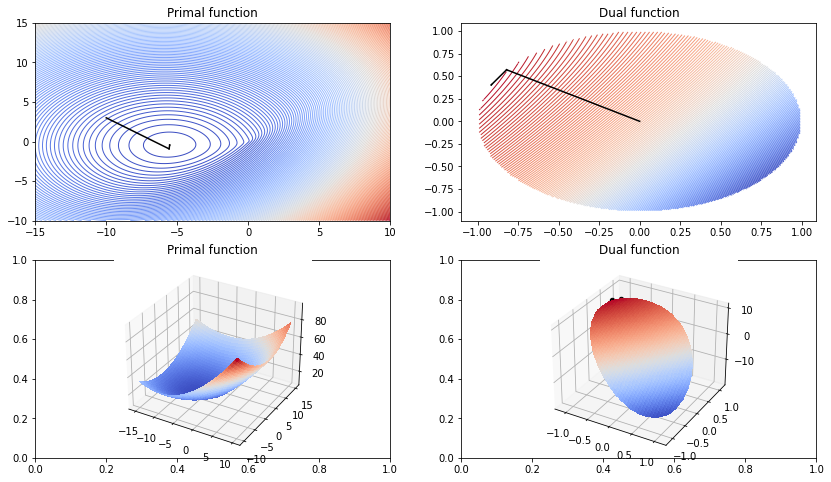

[It. 3 of 1000] |P( x(k) ) - D( y(k) )| = [[6.76899603e-09]]. 9.77350921199767


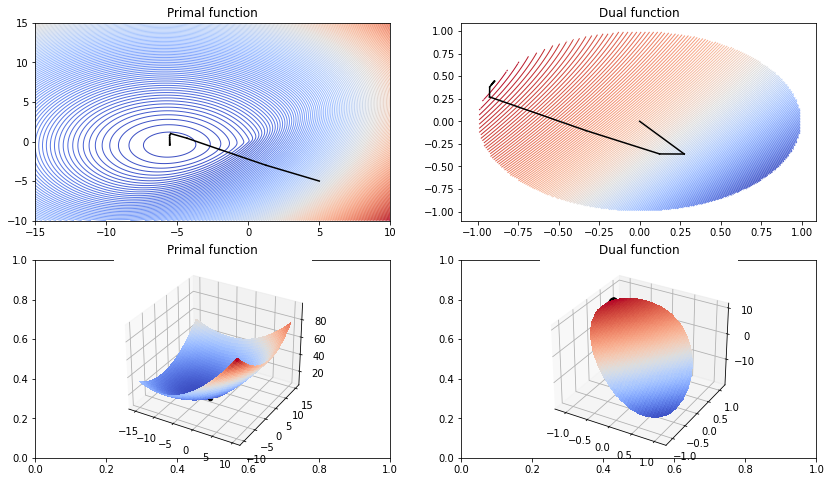

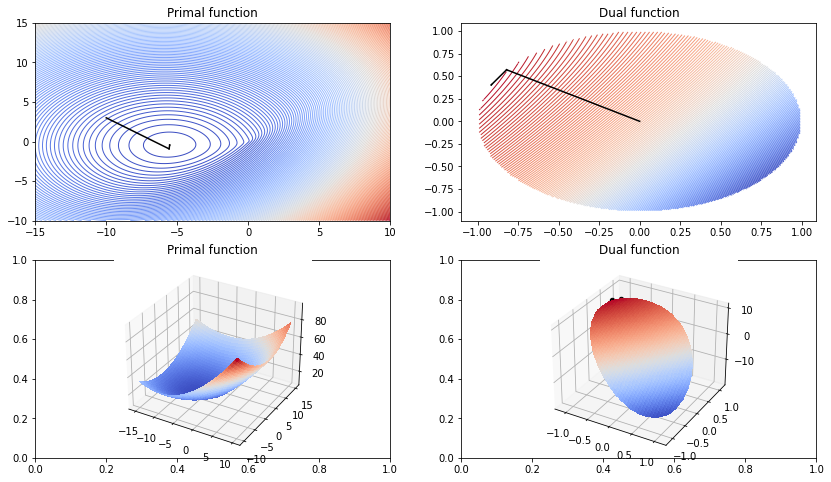

In [ ]:
toy_problem_r2()

In this case we see We see that in the primal-dual approach of this problem, we are also able to find a minimum but in this case the steps follow a polygonal shape, not like before, like some straight segments together, with no curvature this time. This time the primal solutiosnr each the same point, but coming from opposite directions, and the dual reach the same solutions too.. If we look at the primal energy, we observed that both solutions achieved the same value for the Primal energy (9.77) therefore the minimum of the function is at 9.77.

This time the fastest approach is the dual one, which takes just 7 iterations, while the primal-dual takes 16. However, when we set lambda = 10 like the previous case, we see that both the number of iterations and the shape of the followed path of the steps are different than before. About the shape, we notice the same effect than the r1 function, now the path has a more smooth curvature, not just staright lines as before. When it comes to the number of iterations, the primal-dual approach takes 68 iterations. Nevertheless, the dual approach is quite different, since the steps follow a zig-zag path, and this is the reason the mnumber of iterations is just 24, overcoming the primal-dual approach again. Furthermore, with lambda=10, the reached point is 5.40, which is a minimum in the primal approach and a maximum in the dual approach.

However, when we increase the step size with this lambda we obtain the same result as before, that the primal-dual reaches the point sooner but the dual never cogverges, and this is for the same reason as before, that the step size is as big as to impede the algorithm to reach the final point. 